Python3 Curve -to- Curve fit - Tripathi Om Sarveshwarpati

The Program allows to fit one numerical curve , for example named simulation.txt to another experimental curve, named expt.txt . To achieve this task, you need to scale the simulated data (from simulation.txt) so that it best fits the experimental data (from expt.txt). As the x-values might have different intervals in both datasets, we need to interpolate the data to ensure a fair comparison. Then, we can use curve fitting to find the best multiplier that scales the simulation data to matches the experimental data in terms of y-values.

Here's a step-by-step breakdown of the approach:

1. Load the data from the two text files.
2. Interpolate the simulation data to match the x-values of the experimental data.
3. Use curve fitting (least squares) to find the best multiplier that scales the simulation data to fit the experimental data.
4. Plot both curves to visually confirm the fit.


coming to the program, First we import the libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

Now, we will write a function to load data from files:

In [80]:
def load_data(file):
    data = np.loadtxt(file)
    x = data[:, 0]
    y = data[:, 1]
    return x, y

Define the scaling function with multiplier and offset: y_sim_scaled = multiplier * y_sim + offset, and simulated datea is also interpolated here:

In [81]:
def scaling_function(x_sim, multiplier, offset, x_sim_data, y_sim_data):
    # Interpolate simulation data
    interp_func = interp1d(x_sim_data, y_sim_data, kind='linear', fill_value='extrapolate')
    y_sim_interp = interp_func(x_sim)
    return multiplier * y_sim_interp + offset

Function to get indices within a given x range (imposing a mask)

In [82]:
def get_indices_within_range(x, initial_x, final_x):
    return np.where((x >= initial_x) & (x <= final_x))


The main program is below, it has required comments.

In [83]:
def main(simulation_file, experiment_file, initial_x, final_x, plot_in_range):

    x_sim, y_sim = load_data(simulation_file)
    x_exp, y_exp = load_data(experiment_file)


    indices = get_indices_within_range(x_exp, initial_x, final_x)
    x_exp_fit = x_exp[indices]
    y_exp_fit = y_exp[indices]

    # here we fit the simuation data to experimental data by finding the best multiplier and offset
    popt, _ = curve_fit(lambda x, multiplier, offset: scaling_function(x, multiplier, offset, x_sim, y_sim), 
                        x_exp_fit, y_exp_fit, p0=[1, 0])

    best_multiplier, best_offset = popt
    print(f"Best multiplier: {best_multiplier}")
    print(f"Best offset: {best_offset}")

    # Generate the scaled and offset simulation data over the full range
    y_sim_scaled = scaling_function(x_exp, best_multiplier, best_offset, x_sim, y_sim)

    # Calculate the residuals in the fitting range
    y_sim_scaled_fit = scaling_function(x_exp_fit, best_multiplier, best_offset, x_sim, y_sim)
    residuals = y_exp_fit - y_sim_scaled_fit

    # Decide whether to plot the entire data or just the range, we'll see below whats it!
    if plot_in_range.lower() == 'yes':
        x_exp_plot = x_exp_fit
        y_exp_plot = y_exp_fit
        y_sim_scaled_plot = y_sim_scaled[indices]
        residuals_plot = residuals
    else:
        x_exp_plot = x_exp
        y_exp_plot = y_exp
        y_sim_scaled_plot = y_sim_scaled
        residuals_plot = np.zeros_like(x_exp)  # Residuals for the whole range will only be shown within the fit range

    # Plot the experimental and scaled simulation curves
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 6))

    # Main plot: Experimental and scaled simulation curves
    ax1.plot(x_exp_plot, y_exp_plot, label='Expt. BPD current', color='blue', lw=2)
    ax1.plot(x_exp_plot, y_sim_scaled_plot, label='Fitted Simulation', color='red', lw=2, linestyle='--')
    ax1.axvline(x=initial_x, color='green', linestyle=':')
    ax1.axvline(x=final_x, color='purple', linestyle=':')
    ax1.set_xlabel('Detuning')
    ax1.set_ylabel('BPD current')
    ax1.set_title('Best Fit of Simulation to Experimental Data (LS with scaling and offset)')
    ax1.legend()
    ax1.grid(True)

    # Residuals plot 
    ax2.plot(x_exp_fit, residuals, label='Residuals', color='black', lw=1)
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.set_xlabel('Detuning')
    ax2.set_ylabel('Residuals')
    #ax2.set_title()
    ax2.grid(True)

    # Adjust the layout to make the residual plot a thin strip
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.05)  

    # Show the plots
    plt.show()

Here we add input filenames as we said above:

In [84]:
simulation_file = 'simulation.txt'
experiment_file = 'expt.txt'

Define the initial and final x-values for the fitting range (edit as needed)

In [85]:
initial_x = -4.273  # Starting x-value for fitting
final_x = -3.712   # Ending x-value for fitting

Choose whether to plot in the given range or the entire data ('yes' or 'no'). Change to 'no' if you want to plot the entire dataset.

In [86]:
plot_in_range = 'yes'

Run the main function to get the fit:

Best multiplier: 2189525.4815235683
Best offset: 0.19945053763390092


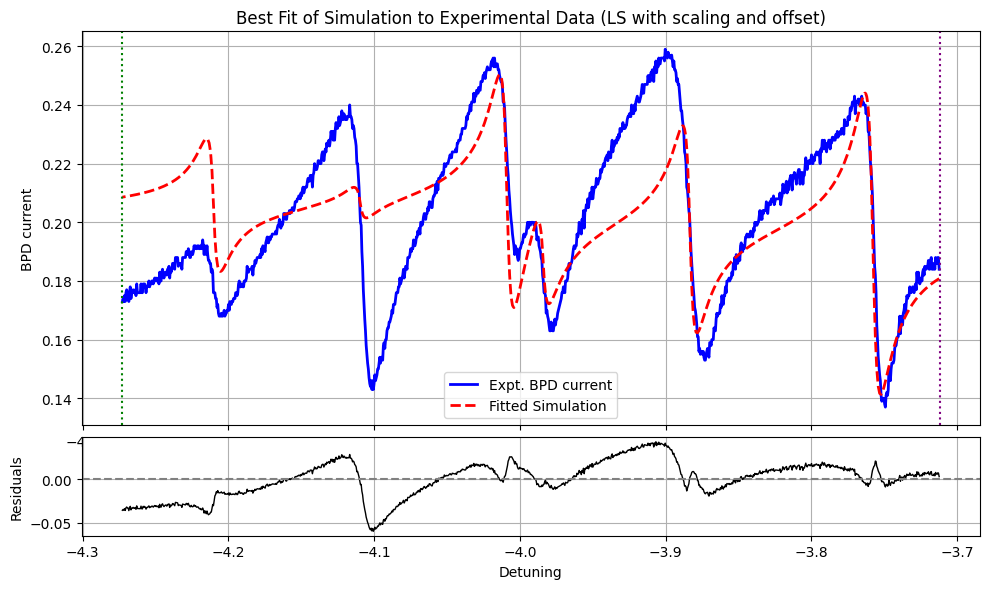

In [87]:
main(simulation_file, experiment_file, initial_x, final_x, plot_in_range)